#  Notebook Project
## Step 1:  Data Collection &  Data Understanding
In this step, we will load and explore the dataset to understand its structure and basic statistics.

In [1]:
import pandas as pd # used for data analysis and manipulation
import numpy as np # used for numerical operations
import seaborn as sns # used for data visualization
import matplotlib.pyplot as plt # used for data visualization
from sklearn.model_selection import train_test_split # used for splitting the dataset into training and testing sets
from sklearn.metrics import accuracy_score # used for evaluating the model's performance
import pickle # used for saving and loading the model
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

 ## 📥 Step 1: Data Loading and Initial Inspection
In this step, I created a custom class called DataCollector to handle data loading and provide an initial summary of the dataset. This class reads the gold price dataset (Gold Prices.csv) and allows structured access to both the data and its overview.

In [4]:
class DataCollector:
    def __init__(self, source_path):
        self.source_path = "Gold  Prices.csv"
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.source_path)
        print(f"Data loaded successfully from {self.source_path}")
        return self.data

    def get_data_summary(self):
        if self.data is None:
            print("Data not loaded yet. Please run load_data() first.")
            return
        print("Data Info:")
        print(self.data.info())
        print("\nFirst 5 rows:")
        print(self.data.head())
        
collector = DataCollector('C:/Users/Lenovo L380 A&I/OneDrive/Desktop/project/Gold  Prices.csv')
data = collector.load_data()
collector.get_data_summary()


Data loaded successfully from Gold  Prices.csv
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1258 non-null   object 
 1   Open           1258 non-null   float64
 2   High           1258 non-null   float64
 3   Low            1258 non-null   float64
 4   Close          1258 non-null   float64
 5   Volume         1258 non-null   int64  
 6   Dividends      1258 non-null   int64  
 7   Stock Splits   1258 non-null   int64  
 8   Capital Gains  1258 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 88.6+ KB
None

First 5 rows:
                        Date        Open        High         Low       Close  \
0  2019-11-11 00:00:00-05:00  137.610001  137.789993  136.440002  137.059998   
1  2019-11-12 00:00:00-05:00  137.029999  137.589996  136.190002  137.429993   
2  2019-11-13 00:00:00-05:00 

## 📊 Step 2: Data Understanding and Exploration
In this step, I created a custom class named DataUnderstanding to analyse the structure and characteristics of the dataset. This class provides methods for understanding the data types, detecting missing values, and exploring the statistical properties of the dataset.

In [ ]:
class DataUnderstanding:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def overview(self):
        # Display basic info and stats about the dataset
        print("Shape of the data:", self.data.shape)
        print("\nData types:\n", self.data.dtypes)
        print("\nMissing values:\n", self.data.isnull().sum())
        print("\nStatistical summary:\n", self.data.describe(include='all'))

    def unique_values(self, column):
        # Print unique values in a column
        unique_vals = self.data[column].unique()
        print(f"Unique values in '{column}':\n{unique_vals}")
        
understanding = DataUnderstanding(data)
understanding.overview()
understanding.unique_values('Capital Gains')


Shape of the data: (1258, 9)

Data types:
 Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Dividends          int64
Stock Splits       int64
Capital Gains      int64
dtype: object

Missing values:
 Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

Statistical summary:
                              Date         Open         High          Low  \
count                        1258  1258.000000  1258.000000  1258.000000   
unique                       1258          NaN          NaN          NaN   
top     2024-11-08 00:00:00-05:00          NaN          NaN          NaN   
freq                            1          NaN          NaN          NaN   
mean                          NaN   177.982234   178.766224   177.144762   
std                           NaN    

## Step 3: Data Preprocessing
To prepare the dataset for model training, I created a class named DataPreprocessing that handles various preprocessing tasks in a structured, OOP-based approach. This ensures cleaner code, reusability, and better control over each transformation.

In [ ]:
class DataPreprocessing:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def drop_columns(self, columns):
        # Drop specified columns from the dataset
        self.data = self.data.drop(columns=columns)

    def fill_missing_with_mean(self, columns):
        # Fill missing values in specified columns with mean
        for col in columns:
            mean_val = self.data[col].mean()
            self.data[col] = self.data[col].fillna(mean_val)

    def fill_missing_with_mode(self, columns):
        # Fill missing values in specified columns with mode
        for col in columns:
            mode_val = self.data[col].mode()[0]
            self.data[col] = self.data[col].fillna(mode_val)

    def encode_categorical(self, columns):
        # Convert categorical columns to dummy/one-hot encoding
        self.data = pd.get_dummies(self.data, columns=columns)

    def normalize_columns(self, columns):
        # Normalize specified numeric columns (Min-Max scaling)
        for col in columns:
            min_val = self.data[col].min()
            max_val = self.data[col].max()
            self.data[col] = (self.data[col] - min_val) / (max_val - min_val)

preprocessor = DataPreprocessing(data)

# Drop irrelevant or too specific columns
preprocessor.drop_columns(['Low', 'Capital Gains'])

# Fill missing numeric values
preprocessor.fill_missing_with_mean(['Dividends', 'Close'  ])


# Fill missing categorical values
preprocessor.fill_missing_with_mode([ 'Close'])

# Encode categorical features
preprocessor.encode_categorical([ 'Dividends', 'Open'])


# Final clean data
processed_data = preprocessor.data
print(processed_data.head())

                        Date        High       Close    Volume  Stock Splits  \
0  2019-11-11 00:00:00-05:00  137.789993  137.059998   7037300             0   
1  2019-11-12 00:00:00-05:00  137.589996  137.429993   6448600             0   
2  2019-11-13 00:00:00-05:00  138.220001  137.979996   8776000             0   
3  2019-11-14 00:00:00-05:00  138.940002  138.559998   5220500             0   
4  2019-11-15 00:00:00-05:00  138.419998  138.210007  10106700             0   

   Dividends_0  Open_136.97999572753906  Open_137.02999877929688  \
0         True                    False                    False   
1         True                    False                     True   
2         True                    False                    False   
3         True                    False                    False   
4         True                    False                    False   

   Open_137.10000610351562  Open_137.32000732421875  ...  \
0                    False                    Fals

## 📈 Step 4: Univariate Analysis
In this step, I conducted Univariate Analysis using a custom class called UnivariateAnalysis. The goal is to individually explore and visualise the distribution of both numeric and categorical features in the dataset.

count    1258.000000
mean      178.766224
std        22.575668
min       137.210007
25%       166.215004
50%       174.460007
75%       184.417500
max       257.709991
Name: High, dtype: float64


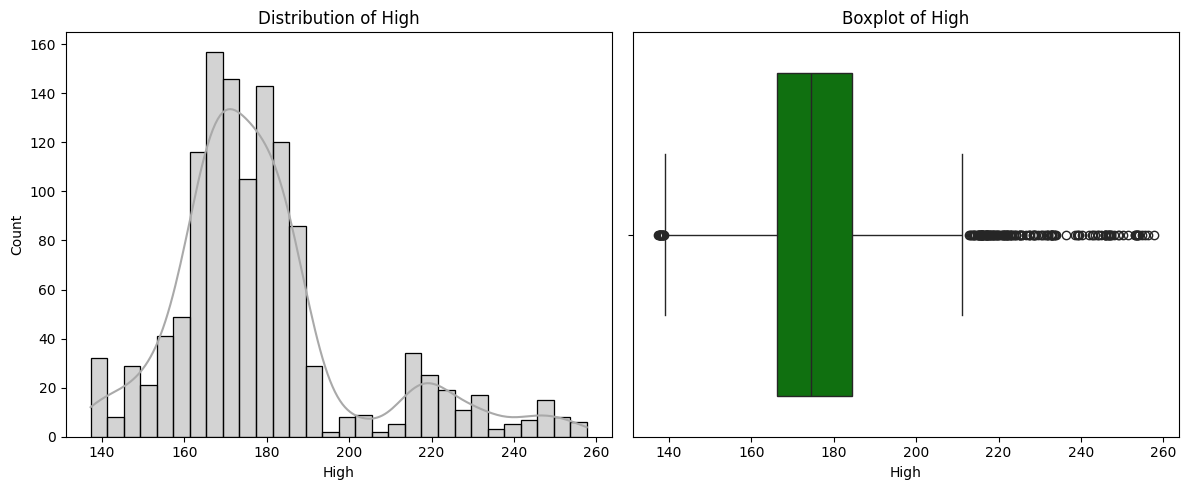

count    1258.000000
mean      177.144762
std        22.377607
min       136.119995
25%       164.814999
50%       172.864998
75%       182.785004
max       255.910004
Name: Low, dtype: float64


C:\Users\Lenovo L380 A&I\AppData\Local\Temp\ipykernel_4192\853731493.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.data[column], palette='Set2')


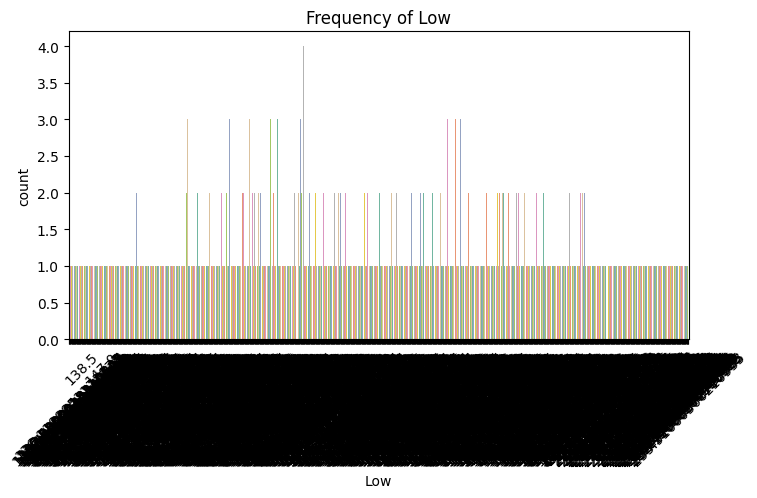

In [ ]:
class UnivariateAnalysis:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def describe_column(self, column):
        # Print basic statistics of a column
        print(self.data[column].describe())

    def plot_numeric(self, column):
        # Plot histogram and boxplot for numeric column
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(self.data[column], kde=True, bins=30, color='darkgrey')
        plt.title(f'Distribution of {column}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.data[column], color='green')
        plt.title(f'Boxplot of {column}')

        plt.tight_layout()
        plt.show()

    def plot_categorical(self, column):
        # Plot countplot for a categorical column
        plt.figure(figsize=(8, 4))
        sns.countplot(x=self.data[column], palette='Set2')
        plt.title(f'Frequency of {column}')
        plt.xticks(rotation=45)
        plt.show()
        
uni = UnivariateAnalysis(data)

# For numeric column
uni.describe_column('High')
uni.plot_numeric('High')

# For categorical column
uni.describe_column('Low')
uni.plot_categorical('Low')



count    1258.000000
mean      177.982234
std        22.490130
min       136.979996
25%       165.432499
50%       173.750000
75%       183.747501
max       256.760010
Name: Open, dtype: float64


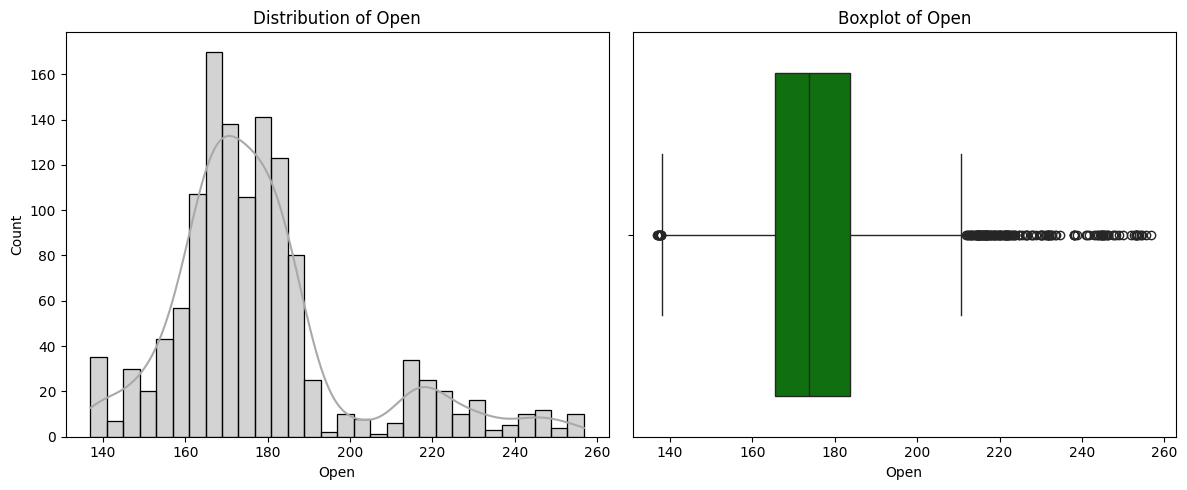

count    1258.000000
mean      177.986478
std        22.503454
min       137.009995
25%       165.419998
50%       173.750000
75%       183.669998
max       257.500000
Name: Close, dtype: float64


C:\Users\Lenovo L380 A&I\AppData\Local\Temp\ipykernel_4192\573292154.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.data[column], palette='Set2')


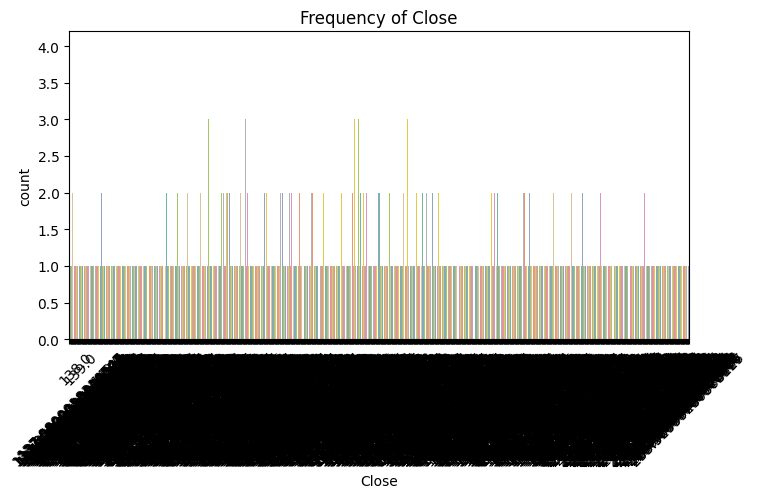

In [ ]:
class UnivariateAnalysis:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def describe_column(self, column):
        # Print basic statistics of a column
        print(self.data[column].describe())

    def plot_numeric(self, column):
        # Plot histogram and boxplot for numeric column
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(self.data[column], kde=True, bins=30, color='darkgrey')
        plt.title(f'Distribution of {column}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.data[column], color='green')
        plt.title(f'Boxplot of {column}')

        plt.tight_layout()
        plt.show()

    def plot_categorical(self, column):
        # Plot countplot for a categorical column
        plt.figure(figsize=(8, 4))
        sns.countplot(x=self.data[column], palette='Set2')
        plt.title(f'Frequency of {column}')
        plt.xticks(rotation=45)
        plt.show()
        
uni = UnivariateAnalysis(data)

# For numeric column
uni.describe_column('Open')
uni.plot_numeric('Open')

# For categorical column
uni.describe_column('Close')
uni.plot_categorical('Close')



## 🔍 Step 5: Bivariate Analysis
In this step, I performed Bivariate Analysis using the BivariateAnalysis class to explore relationships between two variables. This helps identify correlations, patterns, and potential features that influence the target variable.

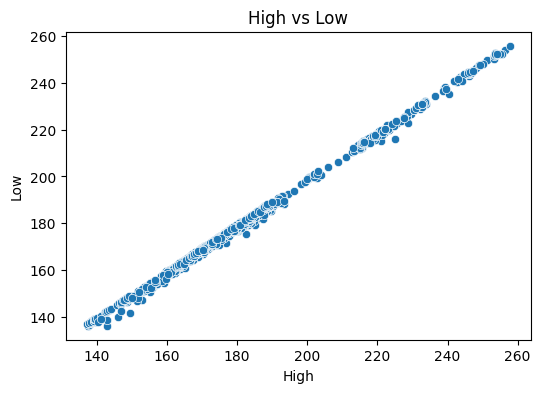

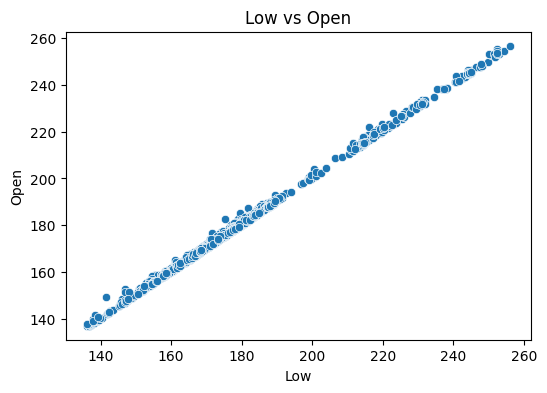

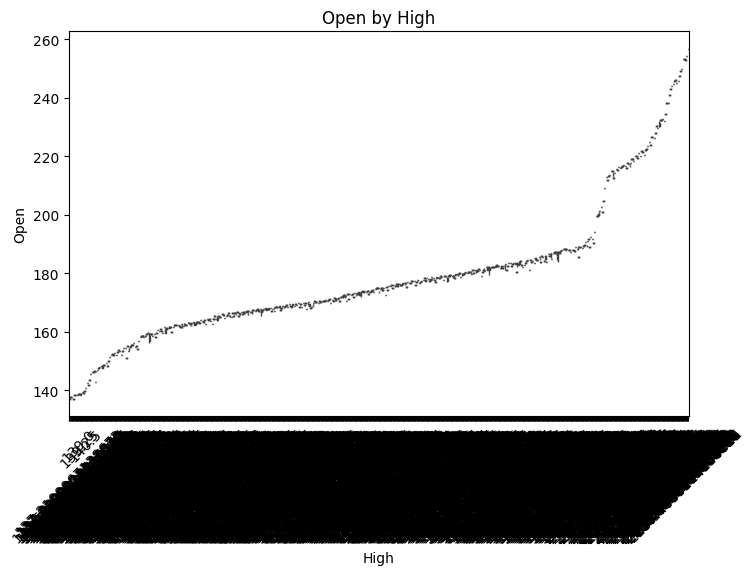

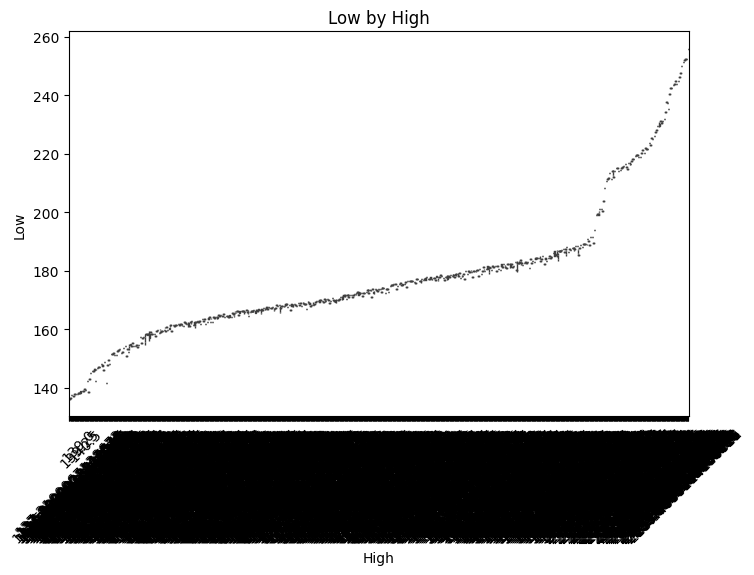

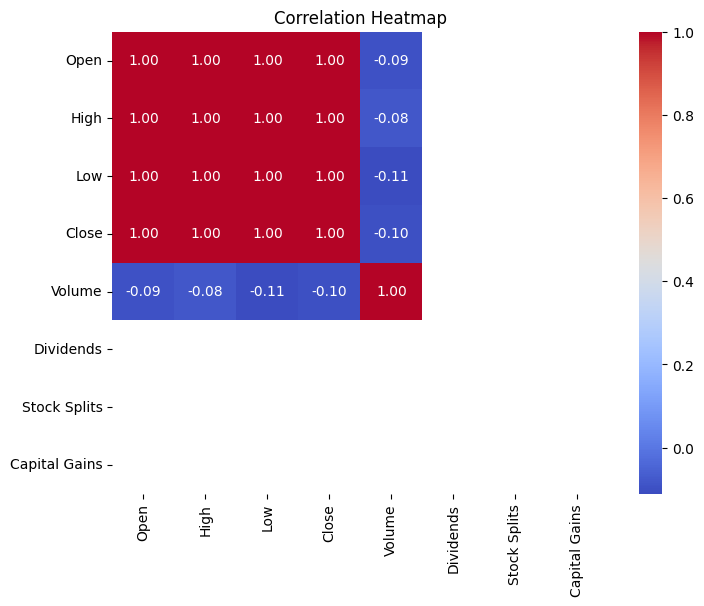

In [ ]:
class BivariateAnalysis:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def scatter_plot(self, x, y):
        # Scatter plot for numeric vs numeric
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=self.data[x], y=self.data[y])
        plt.title(f'{x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    def box_plot(self, x, y):
        # Box plot for categorical vs numeric
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=self.data[x], y=self.data[y])
        plt.title(f'{y} by {x}')
        plt.xticks(rotation=45)
        plt.show()

    def correlation_heatmap(self):
        # Correlation heatmap for numeric columns
        plt.figure(figsize=(8, 6))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()
        
biv = BivariateAnalysis(data)

# Numeric vs numeric
biv.scatter_plot('High', 'Low')
biv.scatter_plot('Low', 'Open')

# Categorical vs numeric
biv.box_plot('High', 'Open')
biv.box_plot('High', 'Low')

# Correlation heatmap
biv.correlation_heatmap()


## Step 6: Train-Test Split
To prepare the data for model training and evaluation, I implemented a custom class called Data_Splitter. This class separates the dataset into features (X) and target (y), then performs a train-test split using train_test_split from Scikit-learn.

In [ ]:
class Data_Splitter:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column

    def split(self, test_size=0.4, random_state=42):
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        return X_train, X_test, y_train, y_test
splitter = Data_Splitter(data, 'High')
X_train, X_test, y_train, y_test = splitter.split(test_size=0.2)
print(X_train, X_test, y_train, y_test)

    


                           Date        Open         Low       Close    Volume  \
1200  2024-08-20 00:00:00-04:00  233.710007  231.130005  232.460007   9073600   
199   2020-08-26 00:00:00-04:00  180.259995  180.199997  183.360001  12715800   
1124  2024-05-01 00:00:00-04:00  212.960007  212.410004  213.789993  10373900   
1158  2024-06-20 00:00:00-04:00  216.320007  216.149994  218.160004   7290500   
381   2021-05-18 00:00:00-04:00  175.179993  174.460007  175.039993   7294000   
...                         ...         ...         ...         ...       ...   
1044  2024-01-05 00:00:00-05:00  189.679993  189.080002  189.350006   7481200   
1095  2024-03-20 00:00:00-04:00  199.160004  199.119995  202.179993   9593800   
1130  2024-05-09 00:00:00-04:00  214.479996  214.440002  216.949997   7732500   
860   2023-04-13 00:00:00-04:00  189.759995  188.990005  189.720001  14060100   
1126  2024-05-03 00:00:00-04:00  212.889999  210.710007  212.960007   8679900   

      Dividends  Stock Spli

## Step 7: Model Training and Evaluation (SVM)
In this step, I built a Support Vector Machine (SVM) regression model to predict the Close Price of gold using engineered features. The model was encapsulated within a custom class ModelTrainer for modularity and clarity.

In [3]:
# Load dataset
df = pd.read_csv("Gold  Prices.csv")

# Drop columns that are not useful
df = df.drop(columns=['Date', 'Stock Splits', 'Capital Gains'])  # Optional, based on relevance

# Handle missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

# Define features and target
X = X = df[['Open', 'High', 'Low', 'Volume', 'Dividends']]
  # Use all other columns as features
y = df['Close']                 # Target is Close price

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model trainer class
class ModelTrainer:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.model = None

    def train_svm(self, kernel='rbf', C=1.0, epsilon=0.1):
        self.model = SVR(kernel=kernel, C=C, epsilon=epsilon)
        self.model.fit(self.X_train, self.y_train)
        print("SVM model trained successfully.")
        return self.model

    def evaluate(self, X_test, y_test):
        predictions = self.model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R² Score: {r2:.2f}")

# Train and evaluate
trainer = ModelTrainer(X_train, y_train)
svm_model = trainer.train_svm(kernel='rbf', C=10, epsilon=0.2)
trainer.evaluate(X_test, y_test)




SVM model trained successfully.
Mean Squared Error: 483.80
R² Score: -0.03


## Step 8: Model Saving and Loading (Using Pickle)
To ensure that the trained SVM model can be reused without retraining, I implemented a class called ModelStorage using Python’s pickle module. This allows the model to be saved to disk and reloaded later for predictions or deployment.

In [4]:
import pickle

class ModelStorage:
    def __init__(self, model):
        # Store the trained model
        self.model = model

    def save_model(self, filename):
        # Save the model to a file
        with open(filename, 'wb') as file:
            pickle.dump(self.model, file)
        print("Model saved to", filename)

    def load_model(self, filename):
        # Load a model from file
        with open(filename, 'rb') as file:
            self.model = pickle.load(file)
        print("Model loaded from", filename)
        return self.model
# Save the trained model
storage = ModelStorage(svm_model)
storage.save_model('svm_gold_model.pkl')

# Load it later
loaded_model = storage.load_model('svm_gold_model.pkl')

Model saved to svm_gold_model.pkl
Model loaded from svm_gold_model.pkl


## Step 9 Visualiser class and plots
- Open vs Close price scatter plot
- Close price distribution
- Correlation matrix
- High vs Low price line plot

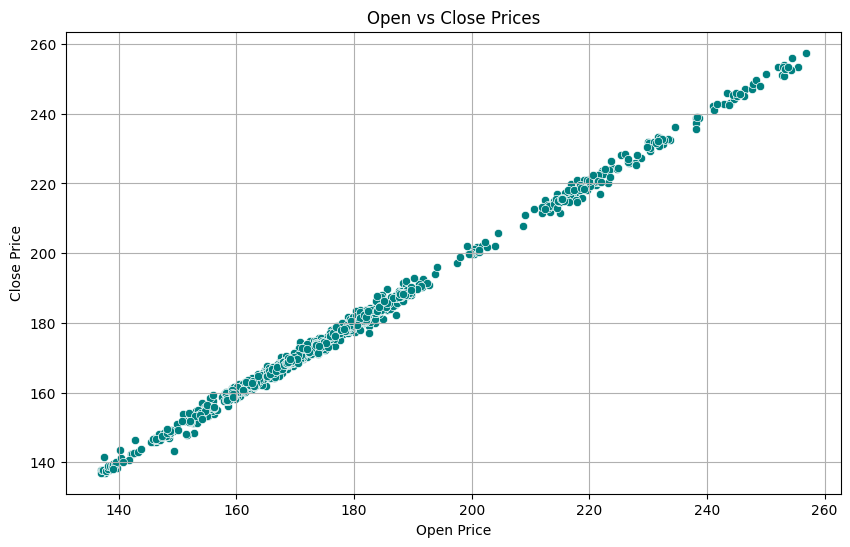

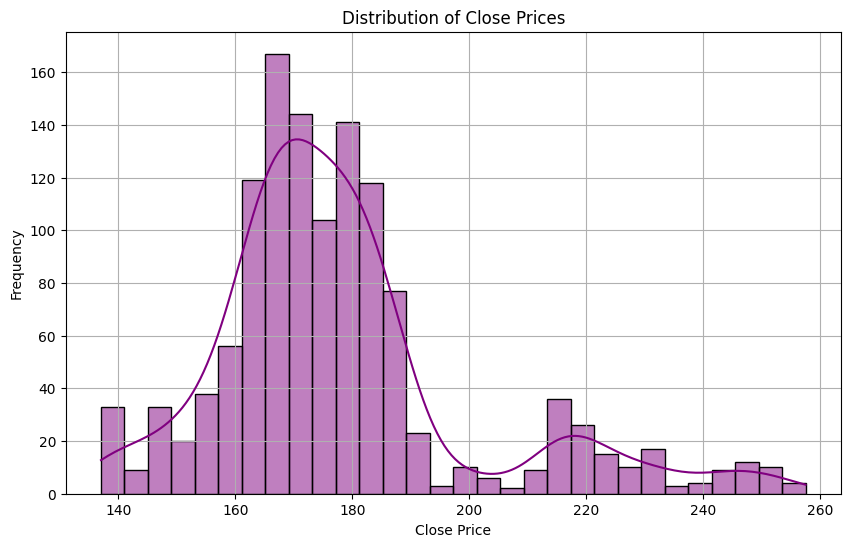

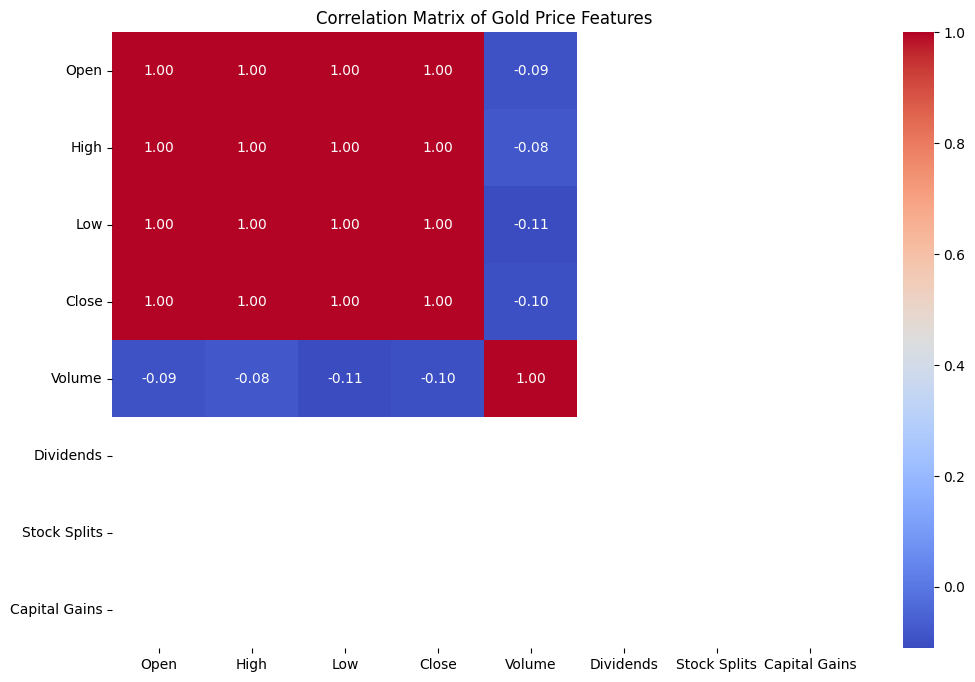

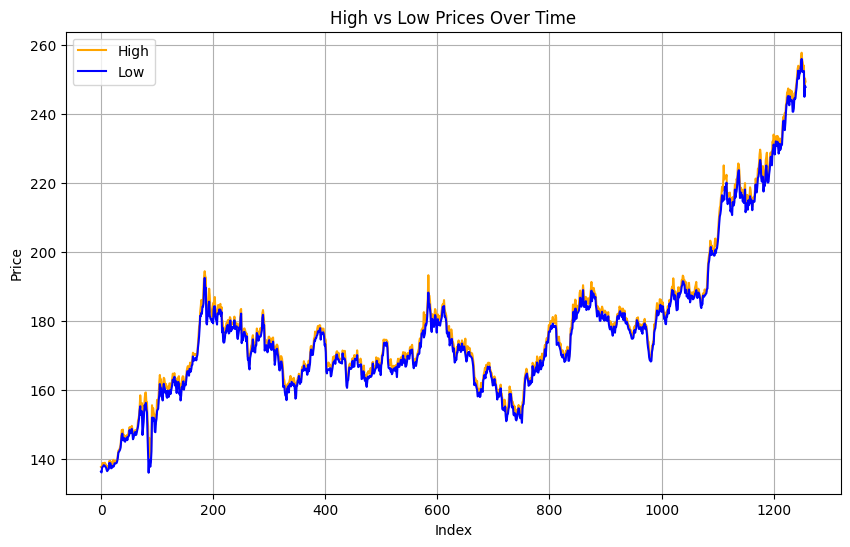

In [5]:

class Visualiser:
    def __init__(self, data):
        self.data = data

    def plot_close_vs_open(self):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=self.data, x='Open', y='Close', color='teal')
        plt.title('Open vs Close Prices')
        plt.xlabel('Open Price')
        plt.ylabel('Close Price')
        plt.grid(True)
        plt.show()

    def plot_close_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.data, x='Close', kde=True, bins=30, color='purple')
        plt.title('Distribution of Close Prices')
        plt.xlabel('Close Price')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    def plot_correlation_matrix(self):
        plt.figure(figsize=(12, 8))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Gold Price Features')
        plt.show()

    def plot_high_vs_low(self):
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=self.data, x=self.data.index, y='High', label='High', color='orange')
        sns.lineplot(data=self.data, x=self.data.index, y='Low', label='Low', color='blue')
        plt.title('High vs Low Prices Over Time')
        plt.xlabel('Index')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()
viz = Visualiser(data)

viz.plot_close_vs_open()
viz.plot_close_distribution()
viz.plot_correlation_matrix()
viz.plot_high_vs_low()
        
